In [1]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


pipe = pipeline(model="fzanartu/flicc", device='cuda')
test = pd.read_csv("/mnt/software/flicc/Data/fallacy_test.csv")
test_result = pipe(test['text'].to_list())
y_pred = [x.get('label') for x in test_result]
y_true = test['label'].to_list()

In [2]:
print(classification_report(y_true, y_pred))

                         precision    recall  f1-score   support

             ad hominem       0.81      0.78      0.79        37
               anecdote       0.88      0.92      0.90        24
         cherry picking       0.77      0.77      0.77        31
      conspiracy theory       0.78      0.82      0.80        22
           fake experts       1.00      1.00      1.00         7
           false choice       0.62      0.71      0.67         7
      false equivalence       0.50      0.38      0.43         8
impossible expectations       0.69      0.86      0.77        21
      misrepresentation       0.68      0.68      0.68        22
     oversimplification       0.78      0.70      0.74        20
           single cause       0.81      0.66      0.72        32
     slothful induction       0.50      0.56      0.53        25

               accuracy                           0.74       256
              macro avg       0.74      0.74      0.73       256
           weighted avg

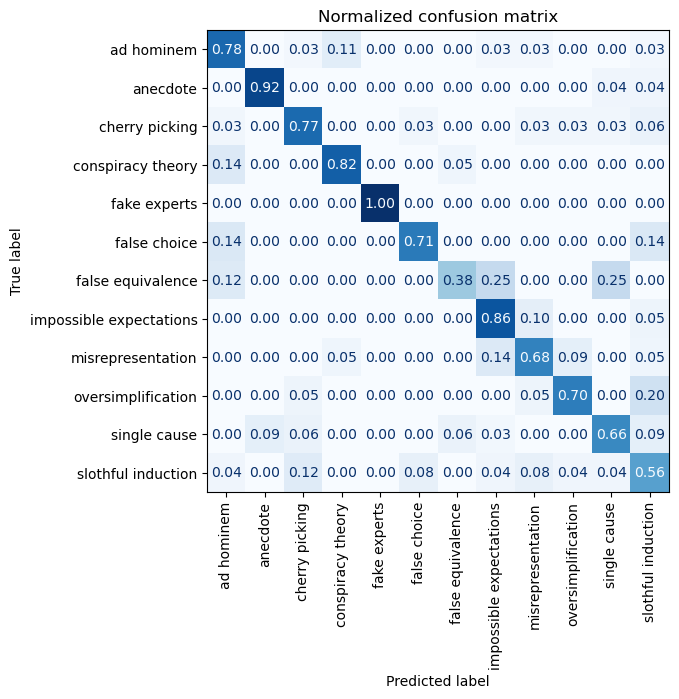

In [3]:
cm = confusion_matrix(y_true, y_pred, normalize='true')
_, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_true)))
disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False, xticks_rotation='vertical')
plt.title("Normalized confusion matrix")
plt.show()